##### 邊緣羽化效果 ( 邊緣模糊化 )
這篇教學會介紹使用 OpenCV 搭配 NumPy 的基本數學運算，透過影像遮罩的方式，實現影像邊緣羽化的效果 ( 邊緣模糊化效果 )。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 建立邊緣模糊遮罩圖片 
使用 np.zeros 建立黑色畫布後，在畫布中心加入白色的圓形，接著進行高斯模糊，就完成一張邊緣模糊的遮罩圖片。

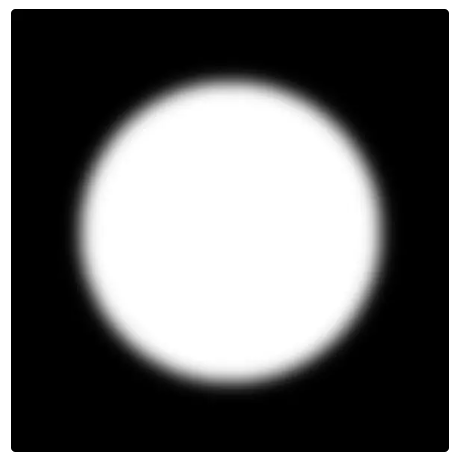

In [1]:
import cv2
import numpy as np

mask = np.zeros((300,300,3), dtype='uint8')      # 建立 300x300 的黑色畫布
cv2.circle(mask,(150,150),100,(255,255,255),-1)  # 在畫布上中心點加入一個半徑 100 的白色圓形
mask = cv2.GaussianBlur(mask, (35, 35), 0)       # 進行高斯模糊

cv2.imshow('oxxostudio', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 根據遮罩黑白比例，合成主角與背景 
因為 OpenCV 的遮罩方法 ( 參考「影像遮罩」 ) 所產生的遮罩「不具有半透明」的功能，因此如果要實現邊緣漸層半透明的邊緣羽化效果，\
必須根據黑色白色的比例進行主角與背景的混合，下方的程式碼執行後，會讀取一張和遮罩同樣尺寸的圖片，以及產生同尺寸的一張白色背景，\
根據遮罩的黑白比例，將白色區域套用到圖片，將黑色區域套用到背景，就能產生邊緣羽化的圖片效果

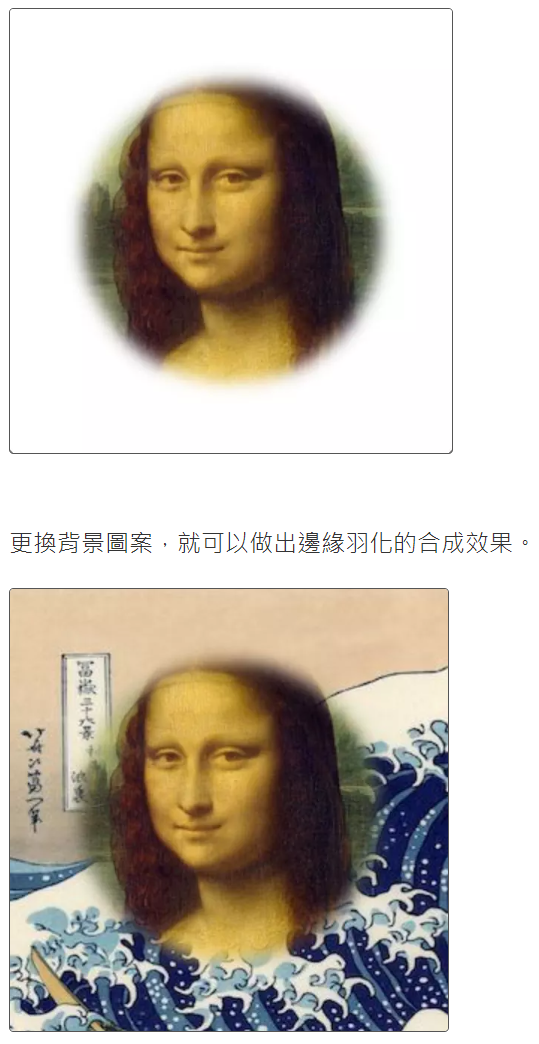

In [5]:
import cv2
import numpy as np

# 讀取圖片並調整大小
img = cv2.imread('meme_1.jpg')
img = cv2.resize(img, (300, 300))  # 調整圖片大小為 300x300

# 創建遮罩並應用高斯模糊
mask = np.zeros((300, 300, 3), dtype='uint8')
cv2.circle(mask, (150, 150), 100, (255, 255, 255), -1)
mask = cv2.GaussianBlur(mask, (35, 35), 0)
mask = mask / 255  # 除以 255，計算每個像素的黑白色彩在 255 中所佔的比例

# 創建白色背景 
# bg = np.zeros((300, 300, 3), dtype='uint8')
# bg = 255 - bg  # 轉換成白色背景
# bg = bg / 255  # 除以 255，計算每個像素的色彩在 255 中所佔的比例

# 更換風景背景
bg = cv2.imread('view_1.jpg')
bg = cv2.resize(bg, (300, 300))  # 調整圖片大小為 300x300
bg = bg / 255  # 除以 255，計算每個像素的色彩在 255 中所佔的比例

# 將圖片和背景除以 255
img = img / 255  # 除以 255，計算每個像素的色彩在 255 中所佔的比例

# 根據比例混合
out = bg * (1 - mask) + img * mask  # 根據比例混合
out = (out * 255).astype('uint8')  # 乘以 255 之後轉換成整數

# 顯示結果
cv2.imshow('oxxostudio', out)
cv2.waitKey(0)
cv2.destroyAllWindows()